In [1]:
import numpy as np




In [2]:
import matplotlib.pyplot as plt

In [3]:
x_train = np.array([1.0, 2.0])          
y_train = np.array([300.0, 500.0])

In [4]:
def com_cost(x,y,w,b):
    
    
    m= x.shape[0]
    cost=0
    for i in range(m):
        #predicted cost mx+c 
        pc=w*x[i]+b
        
        cost=cost+(pc-y[i])**2
        
    tc=(1/(2*m))*cost
    
    return tc
        
        
        

In [5]:
a=com_cost(x_train,y_train,6,10)

print(a)

77285.0


In [6]:

#derivative calculation for gradient descent
def derivative(x,y,w,b):
    
    m=x.shape[0]
    djw=0
    djb=0
    for i in range(m):
        
        pc=w*x[i]+b
        
        djw_i=(pc-y[i])*x[i]
        djb_i=(pc-y[i])
        
        djw+=djw_i
        djb+=djb_i
        
    djw=djw/m
    djb=djb/m
    return djw,djb

        
        
        
        
        
    
    
    
    

In [7]:

#gradient decent 

#
def gd(x,y,w_in,b_in,alpha,num_iters,com_cost,derivative):
    
    J_history=[]
    p_history=[]
    b = b_in
    w = w_in
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = derivative(x, y, w , b) 
         # Update Parameters using equation  above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw  
        
        
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( com_cost(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing
        
        
        
        
    

In [8]:
import math
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient desvg cent
w_final, b_final, J_hist, p_hist = gd(x_train ,y_train, w_init, b_init, tmp_alpha,iterations, com_cost, derivative)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")




Iteration    0: Cost 7.93e+04  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  6.500e+00, b: 4.00000e+00
Iteration 1000: Cost 3.41e+00  dj_dw: -3.712e-01, dj_db:  6.007e-01   w:  1.949e+02, b: 1.08228e+02
Iteration 2000: Cost 7.93e-01  dj_dw: -1.789e-01, dj_db:  2.895e-01   w:  1.975e+02, b: 1.03966e+02
Iteration 3000: Cost 1.84e-01  dj_dw: -8.625e-02, dj_db:  1.396e-01   w:  1.988e+02, b: 1.01912e+02
Iteration 4000: Cost 4.28e-02  dj_dw: -4.158e-02, dj_db:  6.727e-02   w:  1.994e+02, b: 1.00922e+02
Iteration 5000: Cost 9.95e-03  dj_dw: -2.004e-02, dj_db:  3.243e-02   w:  1.997e+02, b: 1.00444e+02
Iteration 6000: Cost 2.31e-03  dj_dw: -9.660e-03, dj_db:  1.563e-02   w:  1.999e+02, b: 1.00214e+02
Iteration 7000: Cost 5.37e-04  dj_dw: -4.657e-03, dj_db:  7.535e-03   w:  1.999e+02, b: 1.00103e+02
Iteration 8000: Cost 1.25e-04  dj_dw: -2.245e-03, dj_db:  3.632e-03   w:  2.000e+02, b: 1.00050e+02
Iteration 9000: Cost 2.90e-05  dj_dw: -1.082e-03, dj_db:  1.751e-03   w:  2.000e+02, b: 1.00024e+02


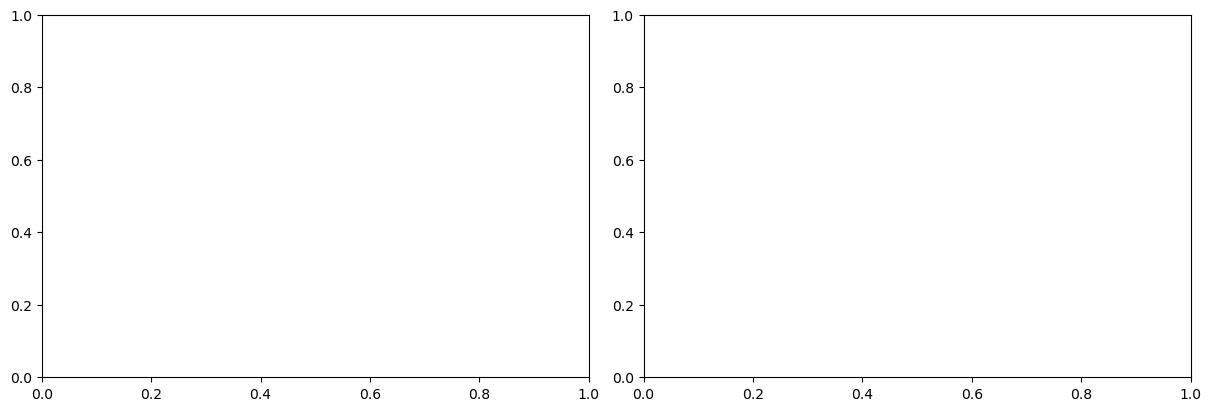

In [16]:
fig,(ax1,ax2)=plt.subplots(1,2,constrained_layout=True,figsize=(12,4))

In [17]:
ax1.plot(J_hist[:100])

In [18]:
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])


In [19]:
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")


Text(0.5, 1.0, 'Cost vs. iteration (end)')

In [20]:
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step')

Text(0.5, 4.444444444444452, 'iteration step')

In [21]:
plt.show()


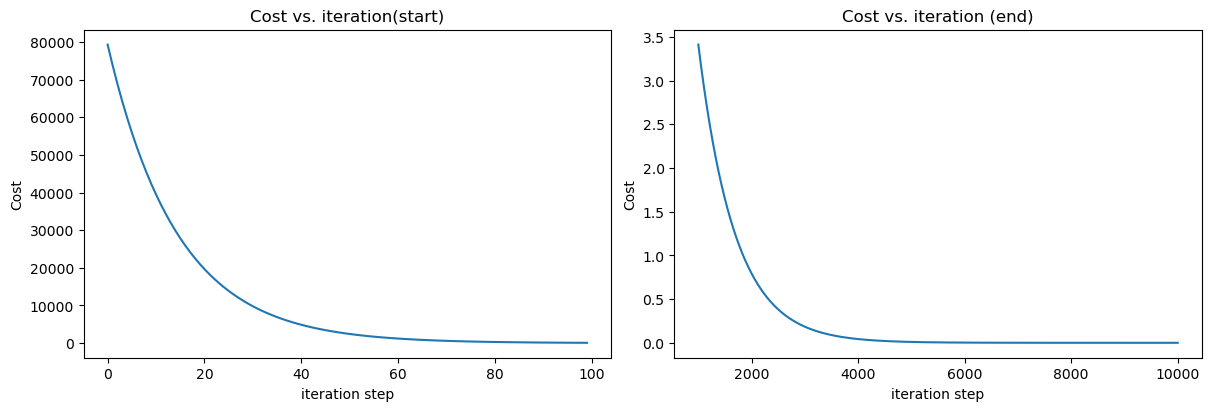

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

In [23]:
print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_final*1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final*2.0 + b_final:0.1f} Thousand dollars")

1000 sqft house prediction 300.0 Thousand dollars
1200 sqft house prediction 340.0 Thousand dollars
2000 sqft house prediction 500.0 Thousand dollars


NameError: name 'plt_contour_wgrad' is not defined

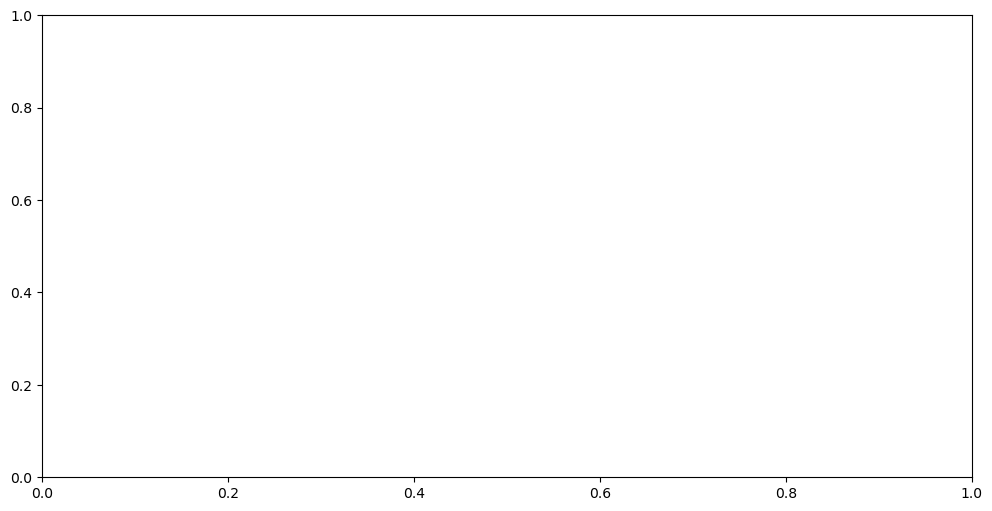